# Réalisation manuelle d'un kNN

Le but de cet exercice est maintenant de programmer nous-même notre classificateur k-NN  en réduisant le problème à 2 variables : largeur et longueur des sépales

In [2]:
#On commence par importer nos bibliothèques habituelles
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Quelques fonctions d'affichages pour la visualisation du kNN

In [2]:
#Affiche les donnees ,le cercle de rayon entourant les k voisins concernes
def showApprentissage_2d(le_point,Xa,Ya,k,labels,legendes):
    x_min, x_max = Xa[:, 0].min() - .5, Xa[:, 0].max() + .5
    y_min, y_max = Xa[:, 1].min() - .5, Xa[:, 1].max() + .5
    plt.figure(0, figsize=(8, 8))
    plt.clf()
    scatter=plt.scatter(Xa[:, 0], Xa[:, 1],c=Ya,cmap=plt.cm.Set1)
    circle=plt.Circle(le_point, dist(le_point,Xa[indiceKNN(le_point,Xa,k)[-1]]), color = 'magenta',fill=False)
    plt.legend(handles=scatter.legend_elements()[0], labels=legendes)
    plt.gca().add_patch(circle)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1]) 
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("Apprentissage d'un point")
    plt.xticks(())
    plt.yticks(())
    
#Affiche en transparant tous les Xa, en couleurs les Xt et le cercle de voisins (dans xA) pour les erreurs trouvées
def showComparaison_2d(Xa,Ya,Xt,Yt,k,labels,legendes):
    predictions=[predict(x,Xa,Ya,k) for x in Xt] #Prediction sur données test[]
    erreurs=[ i  for i in range(len(Xt)) if predictions[i]!=Yt[i]] #Erreurs trouve
       
    plt.figure(figsize=(18, 6))
      
    # première colonne
    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1],c=Y,cmap=plt.cm.Set1,alpha=0.20)
    scatter1=plt.scatter(Xt[:, 0], Xt[:, 1],c=Yt,cmap=plt.cm.Set1)
    plt.legend(handles=scatter1.legend_elements()[0], labels=legendes)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1]) 
    plt.title("Resultats")
    
    # deuxieme colonne
    plt.subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1],c=Y,cmap=plt.cm.Set1,alpha=0.20)
    scatter2=plt.scatter(Xt[:, 0], Xt[:, 1],c=predictions,cmap=plt.cm.Set1)
    for erreur in erreurs:
        circle=plt.Circle(Xt[erreur], dist(Xt[erreur],Xa[indiceKNN(Xt[erreur],Xa,k)[-1]]), color = 'magenta',fill=False)
        plt.gca().add_patch(circle)
    plt.legend(handles=scatter2.legend_elements()[0], labels=legendes)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])  
    plt.title("Predictions")
    
# Représenter sur une même figure les deux jeux de données
# On représente les données pour se faire une petite idée
def showXY_2d(Xa, Xt, Ya, Yt,labels,legendes):
    plt.figure(figsize=(14, 4))
    # première colonne
    plt.subplot(1,2,1)
    scatter1=plt.scatter(Xa[:, 0], Xa[:, 1],c=Ya,cmap=plt.cm.Set1)
    plt.title("Apprentissage")
    plt.legend(handles=scatter1.legend_elements()[0], labels=legendes)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1]) 
    # deuxieme colonne
    plt.subplot(1,2,2)
    scatter2=plt.scatter(Xt[:, 0], Xt[:, 1],c=Yt,cmap=plt.cm.Set1)
    plt.legend(handles=scatter2.legend_elements()[0], labels=legendes)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1]) 
    plt.title("Test")
    

# Données
En ne tenant en compte seulement deux caractéristiques sur 4 :
deux même points peuvent représenter deux iris différentes


In [4]:
iris = datasets.load_iris()
iris.keys()
X = iris.data[:, :2]  # On ne tient compte que des 2 premières caractéristiques : sépales
Y = iris.target

#split
Xa, Xt, Ya, Yt = train_test_split(X,Y,test_size=0.2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


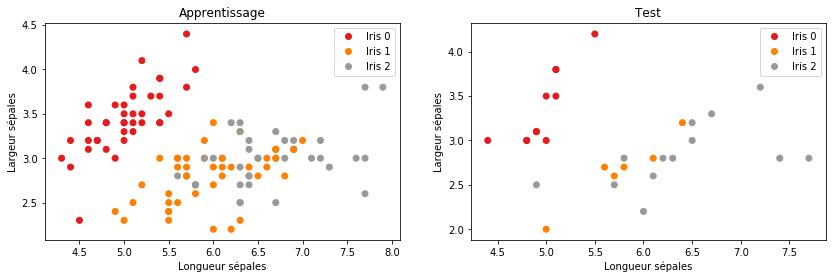

In [4]:
showXY_2d(Xa,Xt,Ya,Yt,["Longueur sépales","Largeur sépales"],['Iris 0','Iris 1','Iris 2'])

# Mesure et kNN

In [5]:
# définir une fonction dist calculant la distance euclidienne dans R^2
def dist(x,y):
    a,b=x
    c,d=y
    return ((c-a)**2+(d-b)**2)**0.5

print(Xt[0],Xa[0])
dist(Xt[0],Xa[0])

[5.7 2.5] [5.1 3.8]


1.4317821063276355

In [6]:
# Ecrire la fonction indiceKNN calculant les indices des k plus proches 
# voisins de x dans la liste Y
# on pourra utiliser la fonction argsort de numpy
def indiceKNN(x,Y,k):
    D=np.array([dist(x,y) for y in Y])  
    L=np.argsort(D) #retourne les indices de D triee par valeur
    return L[:k]
    
le_point=Xt[0]
res=indiceKNN(le_point,Xa,5)
print(res)


[103  20   8  70  53]


In [7]:
# utiliser les fonctions  value_counts et idxmax de pandas 
# pour en déduire la valeur à associer à Xt[0] pour k=5
index = pd.Index([Ya[point] for point in res]) #resultat des voisins
S=index.value_counts()

df = pd.DataFrame({'nb': S.values.tolist()},
                   index=S.index.tolist())
print(S) # serie [resultat -> occurence ]

print(df.idxmax()) # retourne le resultat dont l'occurence est la plus grande
                   # on prefere donc un echantillon de taille impaire



1    3
2    2
dtype: int64
nb    1
dtype: int64


In [8]:
# Regrouper toutes les fonctions précédentes en une fonction predict(x,Xa,Ya,k)
# Donnant la prédiction de la valeur de x après apprentissage d'un k-NN
# sur les données d'apprentissages données en paramètre
def predict(x,Xa,Ya,k):
    voisins=indiceKNN(x,Xa,k)
    values = pd.Index([Ya[point] for point in voisins])    #resultat des voisins
    S=values.value_counts() # serie [resultat -> occurence ]

    D = pd.DataFrame({'nb': S.values.tolist()},
                   index=S.index.tolist())
    return D.idxmax().tolist()[0] # retourne le resultat dont l'occurence est la plus grande
                                  # on prefere donc un echantillon de taille impaire


# Un exemple pour un point

Prediction :  1


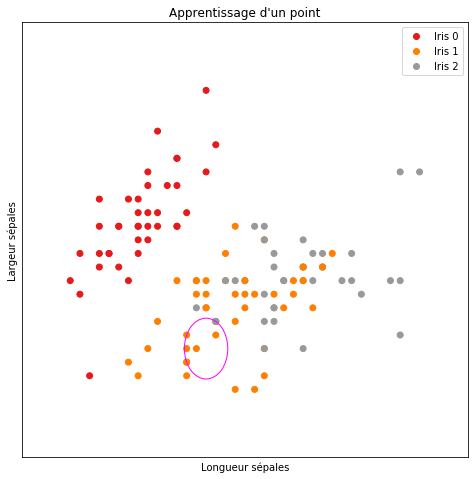

In [9]:
x=Xt[0]
k=5
print("Prediction : ",predict(x,Xa,Ya,k))
showApprentissage_2d(x,Xa,Ya,k,["Longueur sépales","Largeur sépales"],['Iris 0','Iris 1','Iris 2'])

In [10]:
# Ecrire une fonction compare(Xa,Ya,Xt,Yt,k) calculant le score de votre knn
# à l'aide des données de test fournies
def compare(Xa,Ya,Xt,Yt,k):
    predictions=[predict(x,Xa,Ya,k) for x in Xt] #Prediction sur données test
    res= [ prediction==resultat for prediction,resultat in zip(predictions,Yt)] #Comparaison prediction,resultat
    return (res.count(True)/len(Xt))


# Avec les sépales

[1.0, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]
Pour k :  5
0.9333333333333333


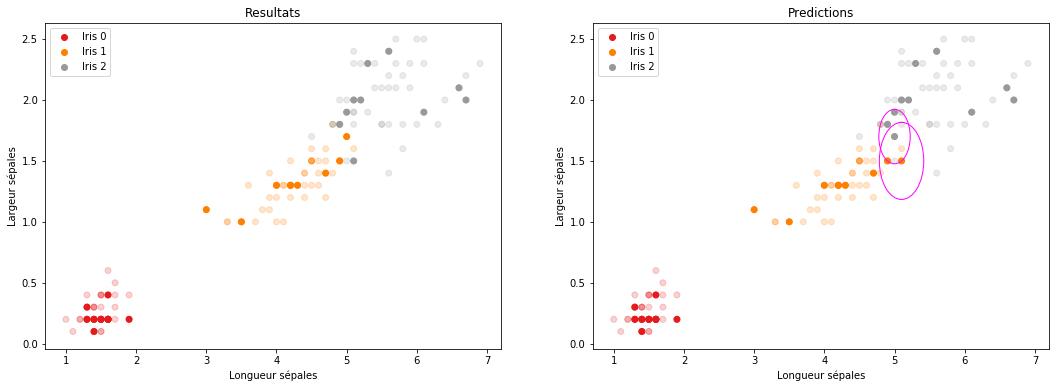

In [14]:
Xa, Xt, Ya, Yt = train_test_split(X,Y,test_size=0.2,shuffle=True)
k=5
showComparaison_2d(Xa,Ya,Xt,Yt,5,["Longueur sépales","Largeur sépales"],['Iris 0','Iris 1','Iris 2'])
print([compare(Xa,Ya,Xt,Yt,i) for i in [1,3,5,7,9,11,13,15]])
print("Pour k : ",k)
print(compare(Xa,Ya,Xt,Yt,k))


# Avec les pétales
Les pétales ont l'air d'avoir des répartitions plus efficaces pour un KNN ( vu sur seaboarn )

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Pour k :  5
0.9666666666666667


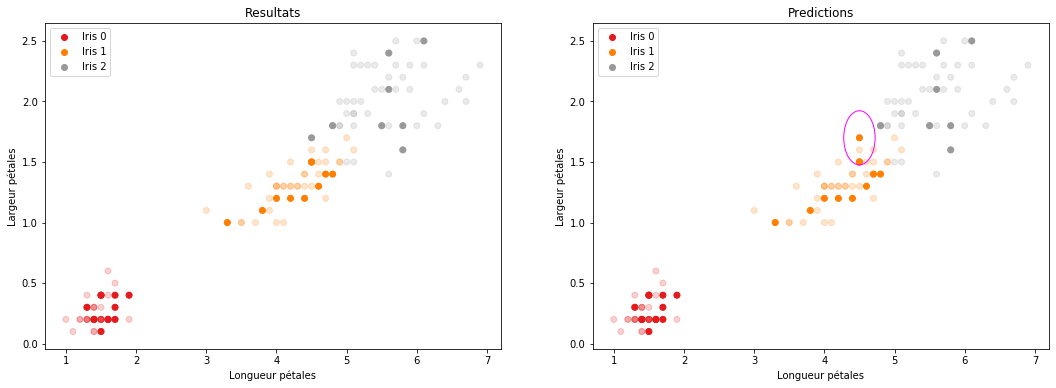

In [12]:
iris = datasets.load_iris()
iris.keys()
X = iris.data[:, 2:]  # On ne tient compte que des 2 dernieres caractéristiques
Y = iris.target
k=5
#A prendre en compte : en utilisant seulement deux variables deux meme points possedent des valeurs differentes 
Xa, Xt, Ya, Yt = train_test_split(X,Y,test_size=0.2,shuffle=True)

print([compare(Xa,Ya,Xt,Yt,i) for i in [1,3,5,7,9,11,13,15]])

print("Pour k : ",k)
print(compare(Xa,Ya,Xt,Yt,k))
showComparaison_2d(Xa,Ya,Xt,Yt,k,["Longueur pétales","Largeur pétales"],['Iris 0','Iris 1','Iris 2'])
